#  Project: Investigate a Dataset - [London Housing dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Olympics dataset 

>This Dataset contains information about the housing in London, area, average price, no of crimes.


## Questions for Analysis:
> What is the minimum and maximum 'average_price' in all areas per year ?

>What is the minimum and maximum number of crimes recorded per area?

>What is the area with the most houses where the price is less than 100K?

>Is there a correlation between the number of crimes and price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df = pd.read_csv('London Housing Data.csv')

In [3]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [5]:
df.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I changed the dtype of the ('date') column from string to datetime64.

>I added two columns ('year') and ('month')

>I checked for null values.

>I checked for duplicates.

In [6]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [7]:
df.duplicated().sum()

0

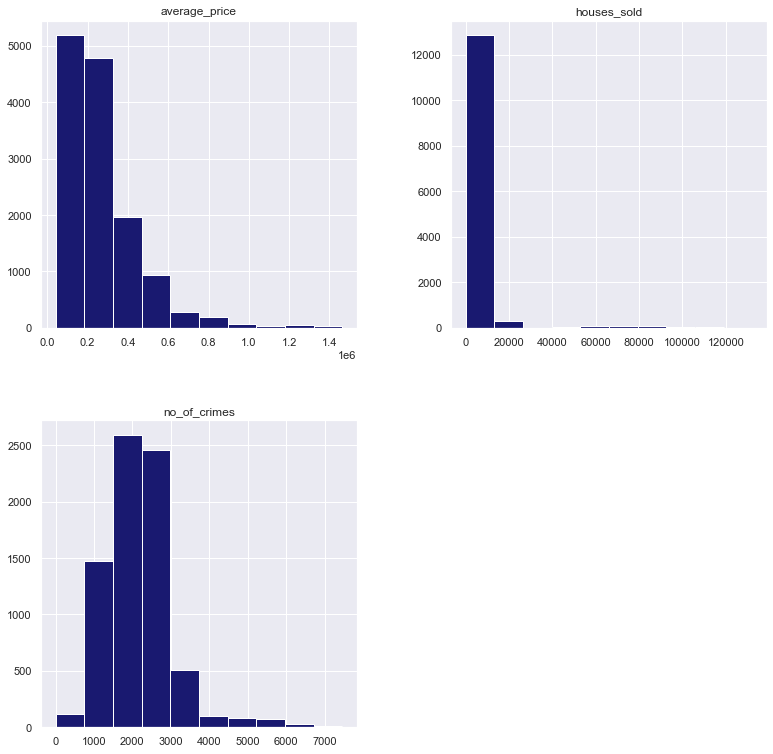

In [8]:
df.hist(figsize=(13,13),
        color = 'midnightblue');

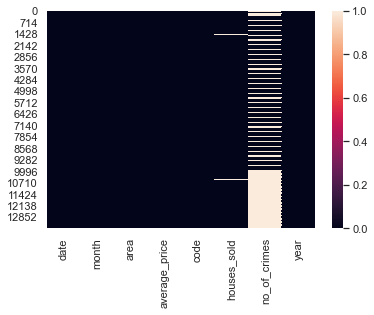

In [40]:
#Using the heatmap to check the null values..
sns.heatmap(df.isnull());

In [10]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [11]:
#Changing the data type of "date" column into datetime
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


In [13]:
#Creating a "year" column from the "date" column for better analysis
df['year'] = df['date'].dt.year

In [14]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [15]:
#Adding a "month" column from the date column..
df.insert(1, 'month', df['date'].dt.month)

In [16]:
df.head()

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


# What is minimum and maximum 'average_price' in all areas per year

In [17]:
min_price_year = df.groupby('year')['average_price'].min()
min_price_year

year
1995     41688
1996     40722
1997     42353
1998     43510
1999     43969
2000     47604
2001     49045
2002     54746
2003     67520
2004     88520
2005    110454
2006    121124
2007    131175
2008    120275
2009    117079
2010    119688
2011    115328
2012    113011
2013    112008
2014    114531
2015    117156
2016    121085
2017    121858
2018    124038
2019    124567
2020    126592
Name: average_price, dtype: int64

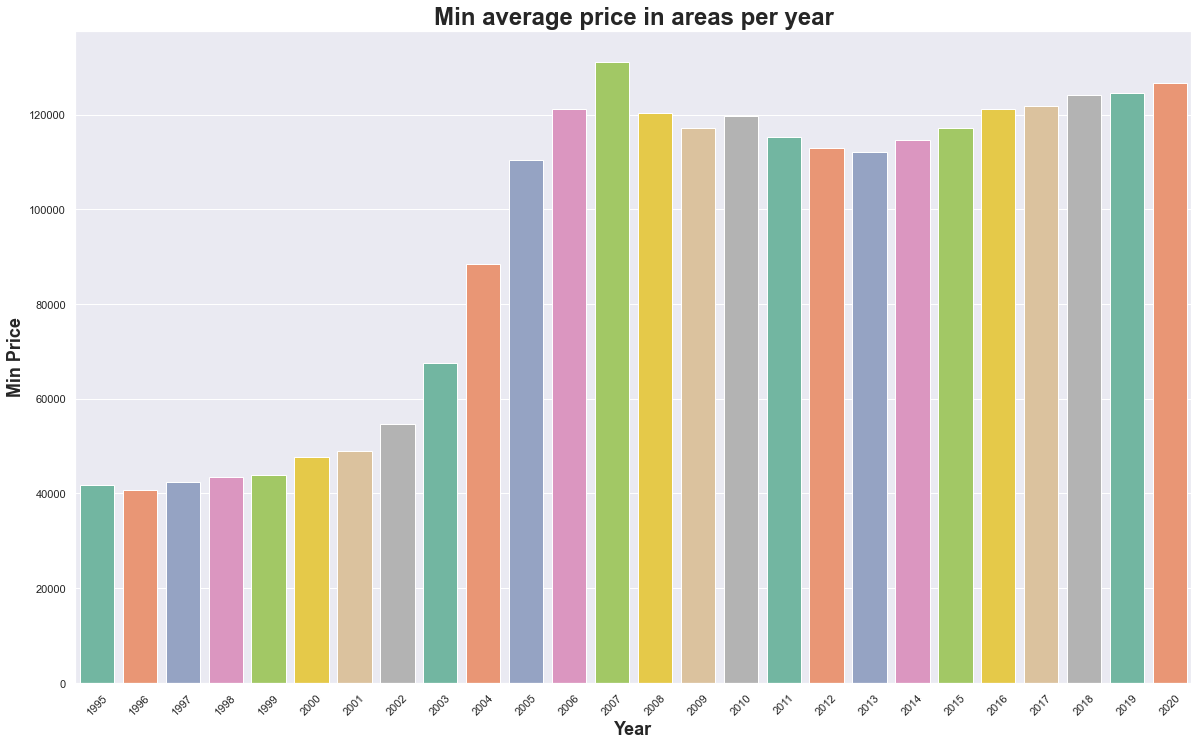

In [18]:
plt.figure(figsize=(20,12))
sns.barplot(x = min_price_year.index,
            y = min_price_year,
            palette= "Set2")
plt.title('Min average price in areas per year', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Min Price', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>In 1995, you could have bought a house for only 40,000.

>Starting from 2005 the minimum price of a house became higher with an average of 110,000.

In [19]:
max_price_year = df.groupby('year')['average_price'].max()
max_price_year

year
1995     200722
1996     223197
1997     265112
1998     277600
1999     354241
2000     397353
2001     451028
2002     497538
2003     488704
2004     559286
2005     555847
2006     644541
2007     830950
2008     832753
2009     782459
2010     884674
2011     959520
2012    1077366
2013    1217729
2014    1365050
2015    1353679
2016    1357231
2017    1412255
2018    1463378
2019    1294113
2020    1178166
Name: average_price, dtype: int64

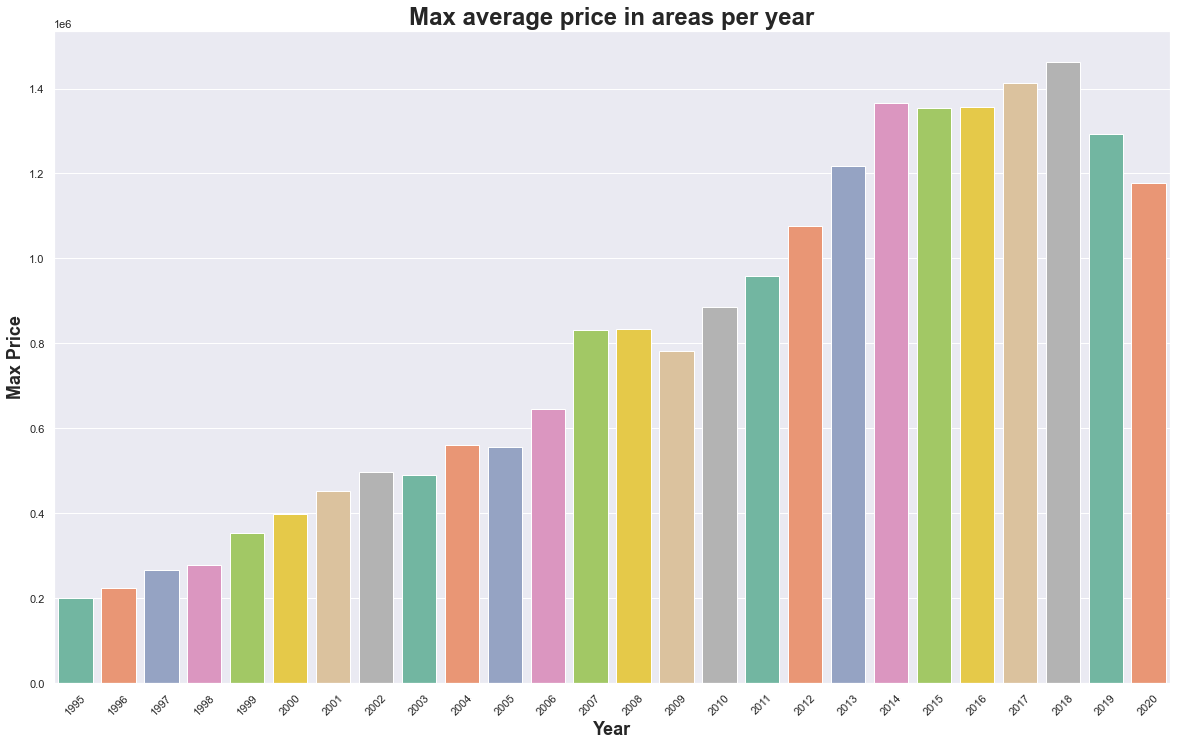

In [20]:
plt.figure(figsize=(20,12))
sns.barplot(x = max_price_year.index,
            y = max_price_year,
            palette= 'Set2')
plt.title('Max average price in areas per year', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Max Price', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>In 1995 the maximum price for a house was around 200,000.

>In 2018 the maximum price reached almost 1,500,000. 

## For england specifically

In [21]:
df['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [22]:
#Creating a data frame for only city of england
england_df = df.query('area == "england"')
england_df

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,1,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,2,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,3,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,4,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,5,england,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


In [23]:
min_price_year_england = england_df.groupby('year')['average_price'].min()
min_price_year_england 

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

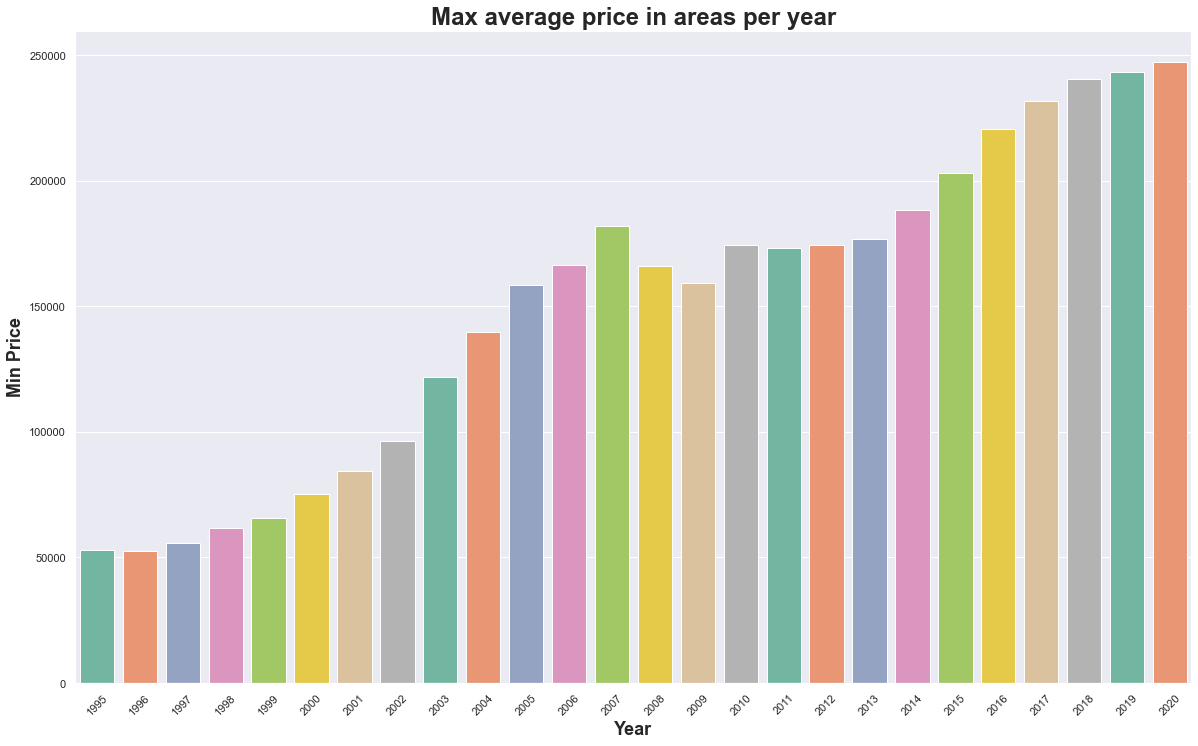

In [24]:
plt.figure(figsize=(20,12))
sns.barplot(x = min_price_year_england.index,
            y = min_price_year_england,
            palette= 'Set2')
plt.title('Max average price in areas per year', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Min Price', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

# What is the maximum and minimum number of crimes recorded per area?

In [25]:
df.head(1)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995


In [26]:
max_no_crimes = df.groupby('area')['no_of_crimes'].max().sort_values(ascending = False)
max_no_crimes

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [27]:
#Dropping the NAN values..
max_no_crimes.dropna(inplace=True)

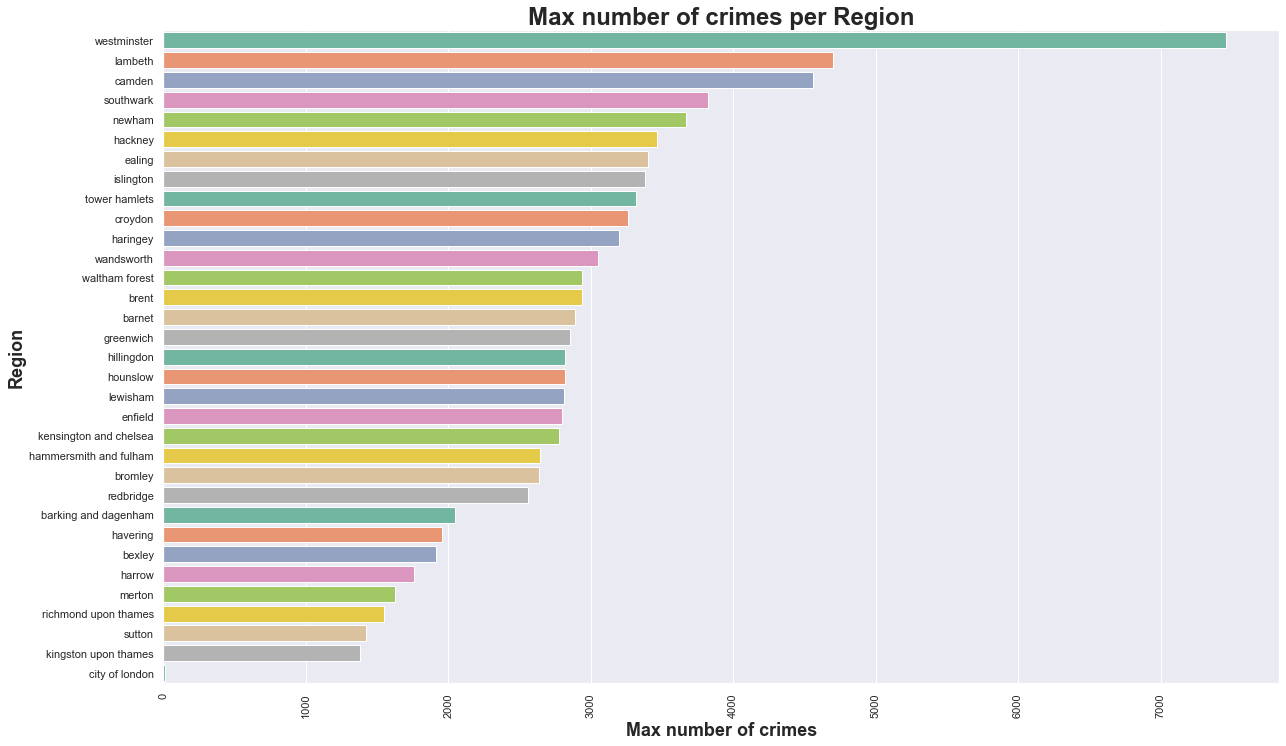

In [28]:
plt.figure(figsize=(20,12))
sns.barplot(x = max_no_crimes,
            y = max_no_crimes.index,
            palette= 'Set2')
plt.title('Max number of crimes per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Max number of crimes', fontsize = 18, weight = 'bold')
plt.ylabel('Region', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>Westminster highest number of crimes was (7461), followed by both, Lambeth (4701) and  Camden (4558)

>Quite amazing that the highest number of crimes recorded in the city of london was only (10) crimes

# Min no of crimes

In [29]:
min_no_crimes = df.groupby('area')['no_of_crimes'].min().sort_values(ascending = False)
min_no_crimes

area
westminster               3504.0
lambeth                   2381.0
southwark                 2267.0
newham                    2130.0
camden                    2079.0
croydon                   2031.0
islington                 1871.0
ealing                    1871.0
hackney                   1870.0
brent                     1850.0
barnet                    1703.0
lewisham                  1675.0
tower hamlets             1646.0
enfield                   1635.0
wandsworth                1582.0
waltham forest            1575.0
haringey                  1536.0
hounslow                  1529.0
greenwich                 1513.0
redbridge                 1487.0
hillingdon                1445.0
bromley                   1441.0
kensington and chelsea    1347.0
hammersmith and fulham    1323.0
barking and dagenham      1217.0
havering                  1130.0
harrow                     937.0
bexley                     860.0
merton                     819.0
sutton                     787.0
richm

In [30]:
#Dropping the NAN values..
min_no_crimes.dropna(inplace=True)

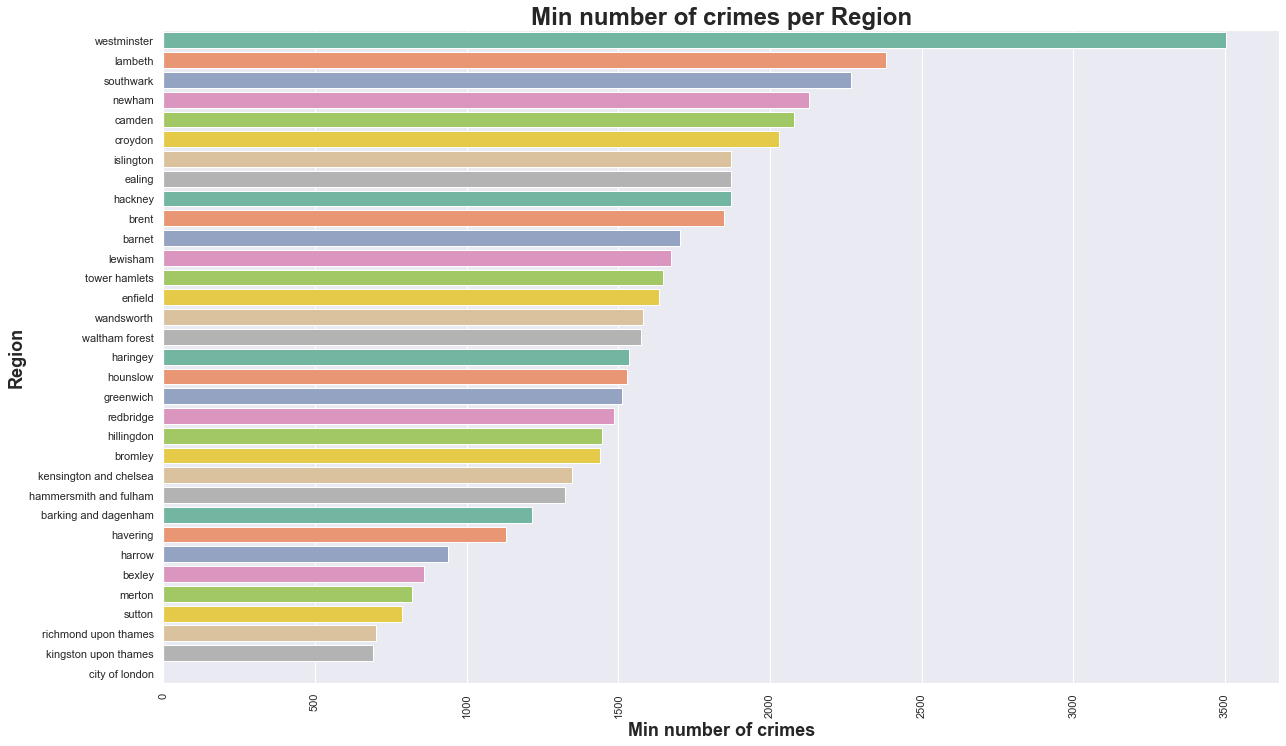

In [31]:
plt.figure(figsize=(20,12))
sns.barplot(x = min_no_crimes,
            y = min_no_crimes.index,
            palette= 'Set2')
plt.title('Min number of crimes per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Min number of crimes', fontsize = 18, weight = 'bold')
plt.ylabel('Region', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>The lowest number of crimes recorded in westminster was 3504, followed by lambeth 2381 and 2267.

>City of london has managed to record a zero crime record before.

# Q: What is the area with highest number of houses where the price is less than 100K?

In [32]:
df.head(1)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995


In [33]:
#Creating a dataframe with houses only less than 100K..
less_than_100k_df = df[df['average_price'] < 100000]


In [34]:
less_than_100k_df.groupby('area')['year'].count().sort_values(ascending = False)

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
ealing                   31
inner london             31
kingston upon thames     30
harrow         

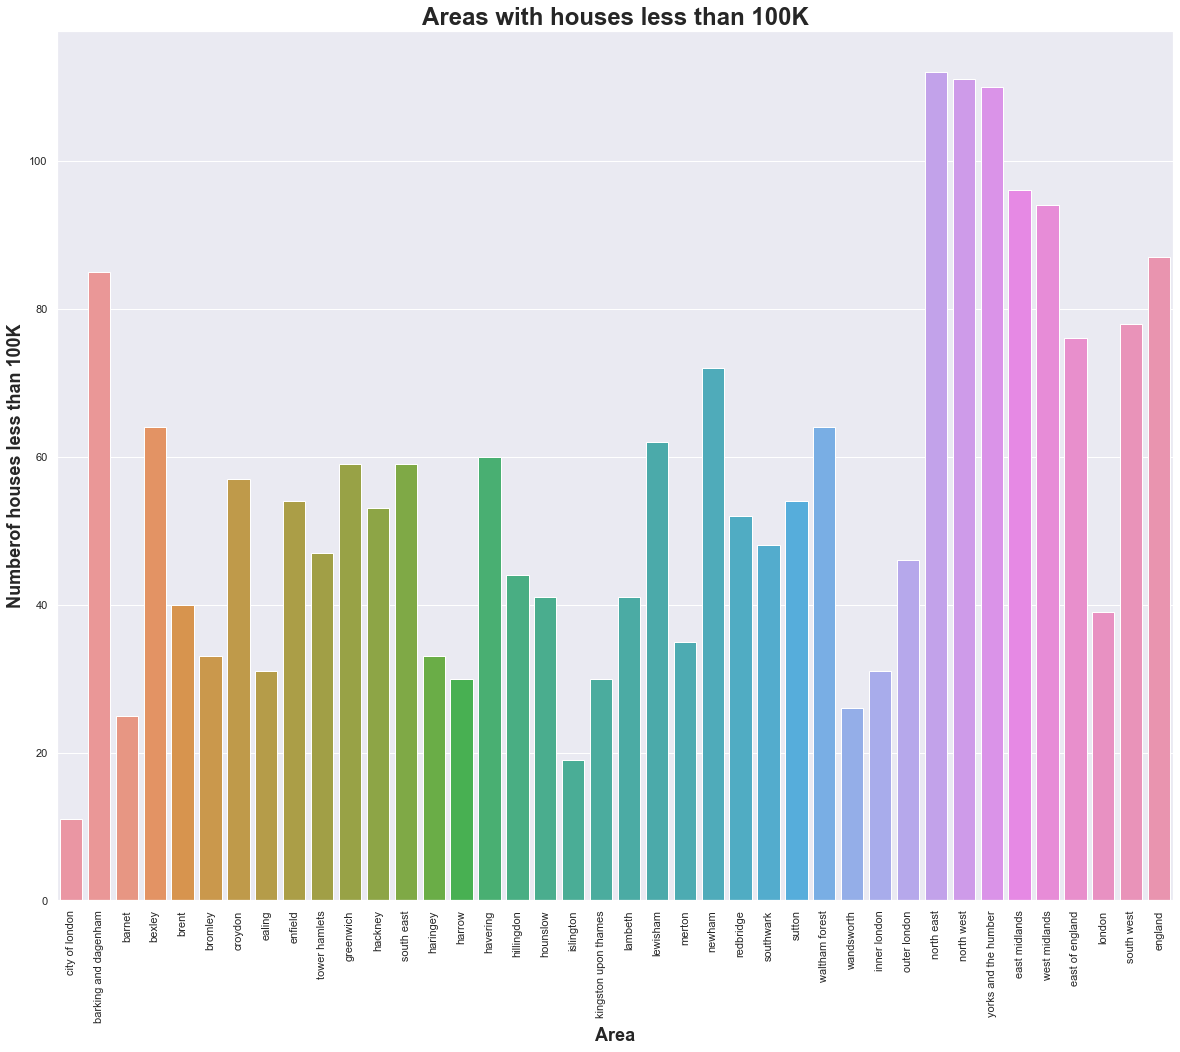

In [35]:
plt.figure(figsize=(20,16))
sns.countplot(x = 'area',
              data = less_than_100k_df )
plt.title('Areas with houses less than 100K', fontsize = 24, weight = 'bold')
plt.xlabel('Area', fontsize = 18, weight = 'bold')
plt.ylabel('Numberof houses less than 100K', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>North East has 112 houses less than 100K, followed by North West with 111 and Yorks and the humber with 110.

# Is there a correlation between the number of crimes and price?

In [36]:
df.head(1)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995


In [37]:
new_df = df.dropna()

In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375 entries, 72 to 9935
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7375 non-null   datetime64[ns]
 1   month          7375 non-null   int64         
 2   area           7375 non-null   object        
 3   average_price  7375 non-null   int64         
 4   code           7375 non-null   object        
 5   houses_sold    7375 non-null   float64       
 6   no_of_crimes   7375 non-null   float64       
 7   year           7375 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 518.6+ KB


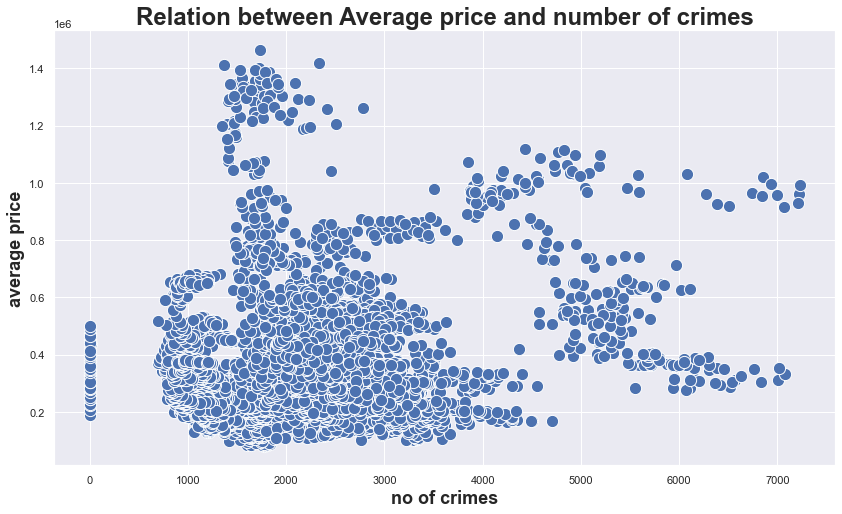

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'no_of_crimes',
                y = 'average_price',
                data = new_df,
                s = 150)
plt.title('Relation between Average price and number of crimes', fontsize = 24, weight = 'bold')
plt.xlabel('no of crimes', fontsize = 18, weight = 'bold')
plt.ylabel('average price', fontsize = 18, weight = 'bold')
plt.show();

>There is a weak negative correlation, It seems that number of crimes isn't the factor with the highest affect on the price, may be the house area and region have a higher affect on a house price.

<a id='conclusions'></a>
# Conclusions:

>In 1995, you could have bought a house for only 40,000.

>Starting from 2005 the minimum price of a house became higher with an average of 110,000.

>In 1995 the maximum price for a house was around 200,000.

>In 2018 the maximum price reached almost 1,500,000. 

>Westminster's maximum number of crimes was (7461), followed by both, Lambeth (4701) and  Camden (4558).

>Quite amazing that the maximum number of crimes recorded in the city of london was only (10) crimes.

>The lowest number of crimes recorded in westminster was (3504), followed by lambeth (2381) and (2267).

>City of london has managed to record a zero crime record before.

>North East has 112 houses less than 100K, followed by North West with 111 and Yorks and the humber with 110.

>There is a weak negative correlation between average price and no of crimes, It seems that number of crimes isn't the factor with the highest affect on the price, may be the house area and region have a higher affect on a house price.